In [241]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import MultipleLocator, LogLocator
from utils.Dataset import CraneDataset
from tqdm.notebook import tqdm


In [242]:
data_file_path_list = []
data_file_name_list = os.listdir('data_2')

for file_name in data_file_name_list:
    data_file_path_list.append(os.path.join('data_2', file_name))

dataset_inst = CraneDataset(data_file_path_list)
raw_dataset = dataset_inst.get_dataset()

dataset = raw_dataset.copy()
dataset = dataset.iloc[0::10]
dataset.reset_index(drop=True, inplace=True)

feature_name_list = dataset_inst.get_data_feature_names()
target_name_list = dataset_inst.get_data_target_names()

for target_name in target_name_list:
    dataset = dataset[dataset[target_name] > 0]

for target_name in target_name_list:
    dataset[target_name] = dataset[target_name]/(9.8*1000)

dataset.reset_index(drop=True, inplace=True)

dataset

  0%|          | 0/22 [00:00<?, ?it/s]

,Time(sec),file_idx,safe_state,dataset_type,Boom_Angle(deg),Swing_Angle(deg),Load(Ton),Roll_Angle(deg),Yaw_Angle(deg),Pitch_Angle(deg),Actual_Load_Left_1(N),Actual_Load_Left_2(N),Actual_Load_Left_3(N),Actual_Load_Left_4(N),Actual_Load_Left_5(N),Actual_Load_Right_1(N),Actual_Load_Right_2(N),Actual_Load_Right_3(N),Actual_Load_Right_4(N),Actual_Load_Right_5(N)
0,0.10025,0.00000,0.00000,0.00000,69.99101,0.00000,40.00000,0.00000,-0.00293,0.00010,16.89398,19.20429,21.56489,23.95678,26.36095,17.32036,19.64064,22.00764,24.40237,26.80585
1,0.20025,0.00000,0.00000,0.00000,69.96439,0.00000,40.00000,0.00001,-0.00881,-0.00003,20.74818,20.02251,19.30097,18.58411,17.87247,21.12668,20.39589,19.66897,18.94649,18.22900
2,0.30025,0.00000,0.00000,0.00000,69.92049,0.00000,40.00000,0.00000,-0.01196,0.00005,16.94533,18.10208,19.27387,20.45827,21.65285,17.24191,18.40179,19.57605,20.76228,21.95806
3,0.40025,0.00000,0.00000,0.00000,69.85967,-0.00000,40.00000,-0.00000,-0.00967,0.00007,16.01961,17.68090,19.37561,21.09634,22.83572,16.22657,17.89255,19.59102,21.31458,23.05587
4,0.50025,0.00000,0.00000,0.00000,69.78228,0.00000,40.00000,0.00000,-0.00471,0.00002,18.45400,18.91449,19.37704,19.84150,20.30774,18.62923,19.08975,19.55226,20.01663,20.48271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,29.76025,21.00000,1.00000,0.00000,56.07803,90.00000,90.00000,-0.00071,0.02110,0.00002,46.58445,46.67465,46.76408,46.85272,46.94057,1.73475,1.94429,2.16458,2.39545,2.63669
8615,29.86025,21.00000,1.00000,0.00000,55.62870,90.00000,90.00000,-0.00073,0.05000,0.00002,46.93049,47.09641,47.25941,47.41944,47.57648,1.18530,1.41677,1.66713,1.93598,2.22290
8616,29.96025,21.00000,1.00000,0.00000,55.17886,90.00000,90.00000,-0.00076,0.06111,0.00003,47.29415,47.51437,47.72879,47.93732,48.13987,0.72089,0.94418,1.19550,1.47414,1.77942
8617,30.06025,21.00000,1.00000,0.00000,54.72888,90.00000,90.00000,-0.00079,0.05403,0.00004,47.60013,47.89002,48.16866,48.43583,48.69128,0.31864,0.51159,0.74765,1.02560,1.34418


In [243]:
dataset.describe()

,Time(sec),file_idx,safe_state,dataset_type,Boom_Angle(deg),Swing_Angle(deg),Load(Ton),Roll_Angle(deg),Yaw_Angle(deg),Pitch_Angle(deg),Actual_Load_Left_1(N),Actual_Load_Left_2(N),Actual_Load_Left_3(N),Actual_Load_Left_4(N),Actual_Load_Left_5(N),Actual_Load_Right_1(N),Actual_Load_Right_2(N),Actual_Load_Right_3(N),Actual_Load_Right_4(N),Actual_Load_Right_5(N)
count,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000,8619.00000
mean,27.96618,8.09711,0.47952,0.20652,65.05262,76.68243,74.56782,-0.03117,0.00484,-0.01063,29.57546,28.38639,26.97112,25.49664,24.16548,21.91115,20.33003,18.83374,17.58350,16.77603
std,17.94722,6.40734,0.49961,0.40483,10.37201,62.47400,23.46831,1.31686,0.11475,0.93265,11.81756,7.76306,5.49978,7.96277,12.12594,11.69039,7.17884,4.24944,6.88064,11.17124
min,0.09025,0.00000,0.00000,0.00000,40.00000,-0.00000,40.00000,-55.21695,-0.16576,-60.88488,0.03343,6.08329,18.63164,0.00271,0.00084,0.00014,0.00573,0.00728,0.00283,0.00049
25%,14.02025,3.00000,0.00000,0.00000,60.00000,16.18962,50.00000,-0.00019,-0.01548,-0.00026,20.64968,21.94952,22.28705,19.27205,13.94172,11.69259,14.64019,15.98944,12.33014,6.98988
50%,23.90025,6.00000,0.00000,0.00000,70.00000,67.66569,70.00000,-0.00008,0.00100,-0.00005,32.16463,28.48271,26.39541,25.31808,22.64892,21.50797,20.39044,19.35321,16.52797,13.95507
75%,39.22025,13.00000,1.00000,0.00000,70.00000,135.00000,90.00000,-0.00000,0.01872,0.00014,39.21195,34.45937,30.46904,31.89675,34.54209,31.44879,25.21359,21.49062,21.08346,24.49285
max,70.00000,21.00000,1.00000,1.00000,80.00000,180.00000,120.00000,2.82207,4.61380,6.48760,51.04903,51.04934,51.04964,51.04995,51.05025,51.02984,51.02917,51.02849,40.39860,50.19888


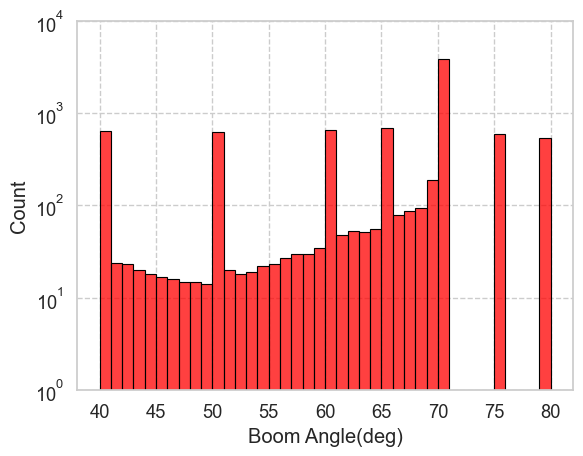

count   8619.00000
mean      65.05262
std       10.37201
min       40.00000
25%       60.00000
50%       70.00000
75%       70.00000
max       80.00000
Name: Boom_Angle(deg), dtype: float64


In [244]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.histplot(data=dataset, x='Boom_Angle(deg)', bins=40, edgecolor='black', color='red')

plt.xlabel('Boom Angle(deg)')
plt.yscale('log')
plt.ylim(1, 10000)

plt.show()

print(dataset['Boom_Angle(deg)'].describe())

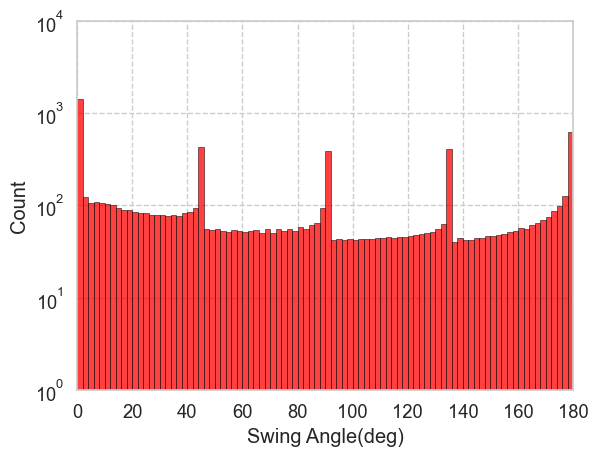

count   8619.00000
mean      76.68243
std       62.47400
min       -0.00000
25%       16.18962
50%       67.66569
75%      135.00000
max      180.00000
Name: Swing_Angle(deg), dtype: float64


In [245]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.histplot(data=dataset, x='Swing_Angle(deg)', bins=90, edgecolor='black', color='red')

plt.xlim(0, 180)
plt.xlabel('Swing Angle(deg)')
plt.yscale('log')
plt.ylim(1, 10000)

plt.show()

print(dataset['Swing_Angle(deg)'].describe())

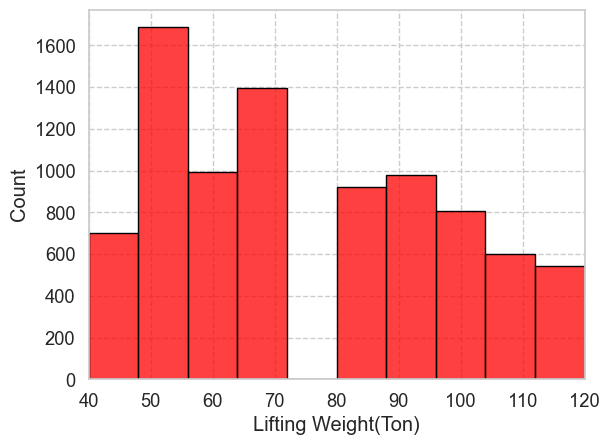

count   8619.00000
mean      74.56782
std       23.46831
min       40.00000
25%       50.00000
50%       70.00000
75%       90.00000
max      120.00000
Name: Load(Ton), dtype: float64


In [246]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.histplot(data=dataset, x='Load(Ton)', bins=10, edgecolor='black', color='red')

plt.xlim(40, 120)
plt.xlabel('Lifting Weight(Ton)')

#plt.ylim(1, 10000)
#plt.yscale('log')

plt.show()

print(dataset['Load(Ton)'].describe())

In [247]:
print(dataset.columns)

Index(['Time(sec)', 'file_idx', 'safe_state', 'dataset_type',
       'Boom_Angle(deg)', 'Swing_Angle(deg)', 'Load(Ton)', 'Roll_Angle(deg)',
       'Yaw_Angle(deg)', 'Pitch_Angle(deg)', 'Actual_Load_Left_1(N)',
       'Actual_Load_Left_2(N)', 'Actual_Load_Left_3(N)',
       'Actual_Load_Left_4(N)', 'Actual_Load_Left_5(N)',
       'Actual_Load_Right_1(N)', 'Actual_Load_Right_2(N)',
       'Actual_Load_Right_3(N)', 'Actual_Load_Right_4(N)',
       'Actual_Load_Right_5(N)'],
      dtype='object')


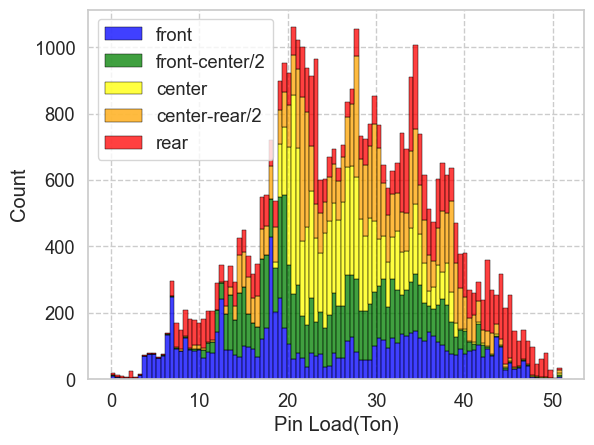

count   8619.00000
mean      74.56782
std       23.46831
min       40.00000
25%       50.00000
50%       70.00000
75%       90.00000
max      120.00000
Name: Load(Ton), dtype: float64


In [248]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

left_load_name_list = dataset.columns[10:15]
legend_name_list = ['front', 'front-center/2', 'center', 'center-rear/2', 'rear']

custom_color = {left_load_name_list[0]: 'red', left_load_name_list[1]: 'orange', left_load_name_list[2]: 'yellow',
                left_load_name_list[3]: 'green', left_load_name_list[4]: 'blue'}

sns.histplot(data=dataset[left_load_name_list], bins=100, edgecolor='black', multiple='stack', palette=custom_color)

#plt.xlim(40, 120)
plt.xlabel('Pin Load(Ton)')

plt.legend(legend_name_list)

plt.show()

print(dataset['Load(Ton)'].describe())

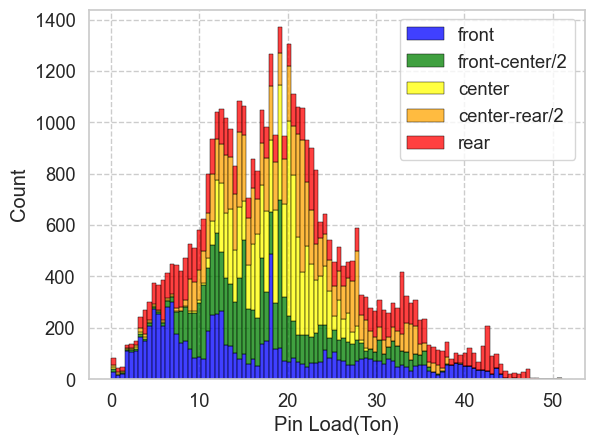

count   8619.00000
mean      74.56782
std       23.46831
min       40.00000
25%       50.00000
50%       70.00000
75%       90.00000
max      120.00000
Name: Load(Ton), dtype: float64


In [249]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

right_load_name_list = dataset.columns[15:20]
legend_name_list = ['front', 'front-center/2', 'center', 'center-rear/2', 'rear']

custom_color = {right_load_name_list[0]: 'red', right_load_name_list[1]: 'orange', right_load_name_list[2]: 'yellow',
                right_load_name_list[3]: 'green', right_load_name_list[4]: 'blue'}


sns.histplot(data=dataset[right_load_name_list], bins=100, edgecolor='black', multiple='stack', palette=custom_color)

#plt.xlim(40, 120)
plt.xlabel('Pin Load(Ton)')

plt.legend(legend_name_list)

plt.show()

print(dataset['Load(Ton)'].describe())

In [250]:
ref_swing_angle_list = np.array([0, 45, 90, 135, 180, 225, 270, 315, 360])
target_load_ratio_list = np.array([0.3, 0.45, 0.2, 0.45, 0.3, 0.45, 0.2, 0.45, 0.3])

left_load_name_list = ['Actual_Load_Left_1(N)', 'Actual_Load_Left_2(N)', 'Actual_Load_Left_3(N)', 'Actual_Load_Left_4(N)', 'Actual_Load_Left_5(N)']
right_load_name_list = ['Actual_Load_Right_1(N)', 'Actual_Load_Right_2(N)', 'Actual_Load_Right_3(N)', 'Actual_Load_Right_4(N)', 'Actual_Load_Right_5(N)']

front_load_name_list = ['Actual_Load_Left_1(N)', 'Actual_Load_Left_2(N)', 'Actual_Load_Right_1(N)', 'Actual_Load_Right_2(N)']
rear_load_name_list = ['Actual_Load_Left_4(N)', 'Actual_Load_Left_5(N)', 'Actual_Load_Right_4(N)', 'Actual_Load_Right_5(N)']

left_load_idx_list = [0, 1, 2, 3, 4]
right_load_idx_list = [5, 6, 7, 8, 9]

front_load_idx_list = [0, 1, 5, 6]
rear_load_idx_list = [3, 4, 8, 9]

mean_left_load_list = []
mean_right_load_list = []
mean_front_load_list = []
mean_rear_load_list = []
roll_over_det_list = []
cal_det_ratio_list = []

n_file = int(dataset['file_idx'].max()+1)

for file_idx in tqdm(range(n_file)):
    data_sample = dataset[dataset['file_idx']==file_idx]

    for i in range(data_sample.shape[0]):
        sample = data_sample.iloc[i, :]
        load_arr = sample[left_load_name_list+right_load_name_list].to_numpy()
        swing_angle = sample['Swing_Angle(deg)'].item()
        target_load_ratio = np.interp(swing_angle, ref_swing_angle_list, target_load_ratio_list)


        mean_left_load = np.mean(load_arr[left_load_idx_list])
        mean_right_load = np.mean(load_arr[right_load_idx_list])
        mean_front_load = np.mean(load_arr[front_load_idx_list])
        mean_rear_load = np.mean(load_arr[rear_load_idx_list])
        mean_total_load = np.mean(load_arr)
        mean_front_rear_load = np.mean(load_arr[front_load_idx_list+rear_load_idx_list])

        left_load_margin = mean_left_load/mean_total_load
        right_load_margin = mean_right_load/mean_total_load
        front_load_margin = mean_front_load/mean_front_rear_load
        rear_load_margin = mean_rear_load/mean_front_rear_load

        roll_over_det = (left_load_margin < target_load_ratio) | (right_load_margin < target_load_ratio) | (front_load_margin < target_load_ratio) | (rear_load_margin < target_load_ratio)
        roll_over_det = roll_over_det.astype(int)

        mean_left_load_list.append(left_load_margin)
        mean_right_load_list.append(right_load_margin)
        mean_front_load_list.append(front_load_margin)
        mean_rear_load_list.append(rear_load_margin)
        roll_over_det_list.append(roll_over_det)
        cal_det_ratio_list.append(target_load_ratio)

mean_left_load_arr = np.array(mean_left_load_list)
mean_right_load_arr = np.array(mean_right_load_list)
mean_front_load_arr = np.array(mean_front_load_list)
mean_rear_load_arr = np.array(mean_rear_load_list)
roll_over_det_arr = np.array(roll_over_det_list)

dataset = pd.concat([dataset, pd.DataFrame(roll_over_det_arr, columns=['roll_over_det'])], axis=1)
dataset = pd.concat([dataset, pd.DataFrame(mean_left_load_arr, columns=['mean_left_load'])], axis=1)
dataset = pd.concat([dataset, pd.DataFrame(mean_right_load_arr, columns=['mean_right_load'])], axis=1)
dataset = pd.concat([dataset, pd.DataFrame(mean_front_load_arr, columns=['mean_front_load'])], axis=1)
dataset = pd.concat([dataset, pd.DataFrame(mean_rear_load_arr, columns=['mean_rear_load'])], axis=1)
dataset = pd.concat([dataset, pd.DataFrame(cal_det_ratio_list, columns=['cal_det_ratio'])], axis=1)

print(dataset.shape)

  0%|          | 0/22 [00:00<?, ?it/s]

(8619, 26)


In [257]:
temp = dataset[dataset['file_idx'] == 16]
temp.reset_index(drop=True, inplace=True)
temp.describe()

,Time(sec),file_idx,safe_state,dataset_type,Boom_Angle(deg),Swing_Angle(deg),Load(Ton),Roll_Angle(deg),Yaw_Angle(deg),Pitch_Angle(deg),...,Actual_Load_Right_2(N),Actual_Load_Right_3(N),Actual_Load_Right_4(N),Actual_Load_Right_5(N),roll_over_det,mean_left_load,mean_right_load,mean_front_load,mean_rear_load,cal_det_ratio
count,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,...,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000,321.00000
mean,18.24025,16.00000,1.00000,0.00000,65.98721,34.01697,50.00000,-0.00004,0.00079,-0.00009,...,20.92258,18.93757,17.11709,15.54348,0.01869,1.07012,0.92988,1.14250,0.85750,0.41339
std,9.28089,0.00000,0.00000,0.00000,8.27901,14.61481,0.00000,0.00007,0.01465,0.00009,...,1.00039,2.92993,4.51554,5.53492,0.13564,0.12470,0.12470,0.13817,0.13817,0.04872
min,2.24025,16.00000,1.00000,0.00000,40.49318,1.56734,50.00000,-0.00030,-0.03817,-0.00041,...,17.46626,8.71766,2.44225,0.00049,0.00000,0.99031,0.53988,1.03855,0.41721,0.30522
25%,10.24025,16.00000,1.00000,0.00000,68.73006,23.31070,50.00000,-0.00001,-0.00970,-0.00005,...,20.93326,20.00163,19.00173,17.82826,0.00000,1.00711,0.97408,1.07290,0.90611,0.37770
50%,18.24025,16.00000,1.00000,0.00000,70.00000,44.01617,50.00000,-0.00001,0.00097,-0.00005,...,21.20033,20.15086,19.09745,17.98431,0.00000,1.01843,0.98157,1.08673,0.91327,0.44672
75%,26.24025,16.00000,1.00000,0.00000,70.00000,45.00000,50.00000,-0.00000,0.01094,-0.00004,...,21.48985,20.38072,19.19022,18.13685,0.00000,1.02592,0.99289,1.09389,0.92710,0.45000
max,34.24025,16.00000,1.00000,0.00000,70.00000,45.00000,50.00000,0.00001,0.03199,-0.00002,...,22.03170,20.73836,19.94308,19.40159,1.00000,1.46012,1.00969,1.58279,0.96145,0.45000


Text(0, 0.5, 'Angle(deg)')

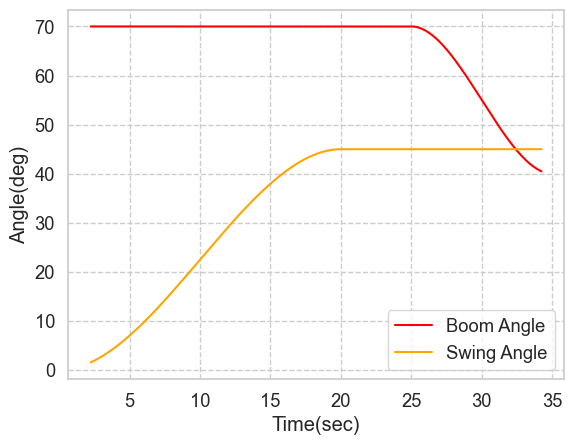

In [258]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.lineplot(data=temp, x='Time(sec)', y='Boom_Angle(deg)', color='red', label='Boom Angle')
sns.lineplot(data=temp, x='Time(sec)', y='Swing_Angle(deg)', color='orange', label='Swing Angle')

plt.ylabel('Angle(deg)')


Text(0, 0.5, 'Load(Ton)')

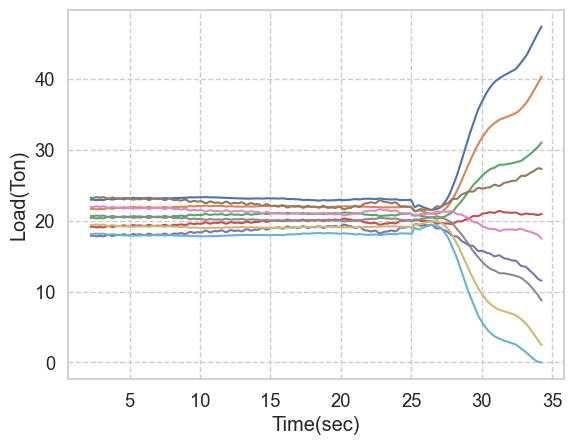

In [259]:
for target_name in target_name_list:
    sns.lineplot(data=temp, x='Time(sec)', y=target_name)

plt.ylabel('Load(Ton)')

<Axes: xlabel='Time(sec)', ylabel='mean_left_load'>

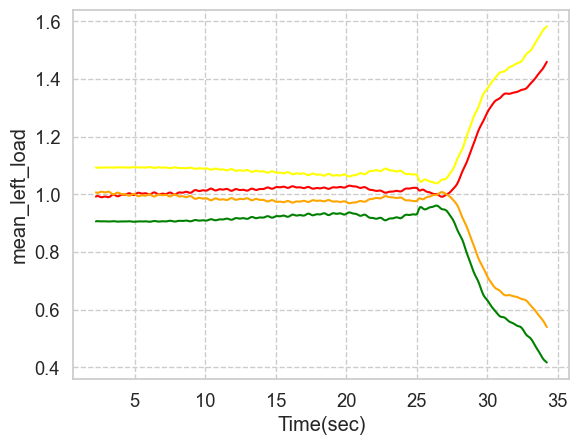

In [260]:
sns.lineplot(data=temp, x='Time(sec)', y='mean_left_load', color='red')
sns.lineplot(data=temp, x='Time(sec)', y='mean_right_load', color='orange')
sns.lineplot(data=temp, x='Time(sec)', y='mean_front_load', color='yellow')
sns.lineplot(data=temp, x='Time(sec)', y='mean_rear_load', color='green')

<Axes: xlabel='Time(sec)', ylabel='cal_det_ratio'>

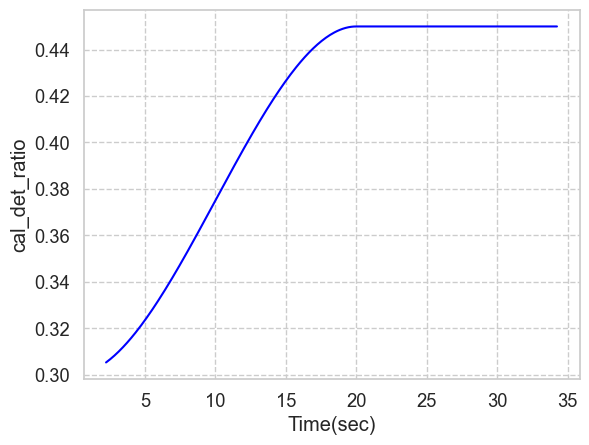

In [261]:
sns.lineplot(data=temp, x='Time(sec)', y='cal_det_ratio', color='blue')

Text(0, 0.5, 'Safe Status')

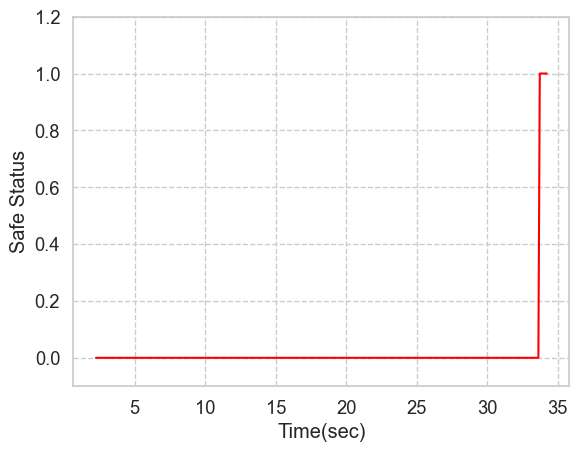

In [263]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.lineplot(data=temp, x='Time(sec)', y='roll_over_det', color='red')


plt.ylim(-0.1, 1.2)
plt.ylabel('Safe Status')

(1, 10000)

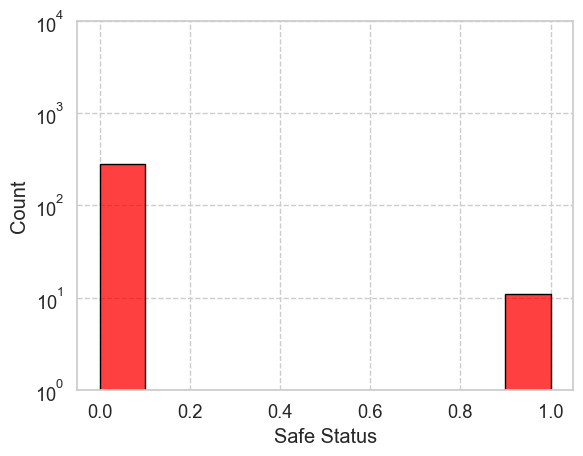

In [222]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.histplot(roll_over_det_arr, edgecolor='black', color='red')

plt.xlabel('Safe Status')

plt.yscale('log')
plt.ylim(1, 10000)

In [12]:
train_feature = dataset[feature_name_list[0:3]].to_numpy()
train_target = dataset['roll_over_det'].to_numpy()

n_samples = 1000
max_len = 1000

random_start_idx = np.random.randint(low=0, high=train_feature.shape[0]-max_len, size=n_samples)
random_len_idx = np.random.randint(low=300, high=max_len+1, size=n_samples)

feature_buf = np.empty(shape=(0, train_feature.shape[1]))
target_buf = np.empty(shape=(0,))

for i, j in zip(random_start_idx, random_len_idx):
    feature_buf = np.concatenate([feature_buf, train_feature[i:i+j]], axis=0)
    target_buf = np.concatenate([target_buf, train_target[i:i+j]], axis=0)

new_train_feature = feature_buf
new_train_target = target_buf

print(new_train_feature.shape, new_train_target.shape)

print((new_train_feature.itemsize*new_train_feature.size)/(1024**2))
print((new_train_target.itemsize*new_train_target.size)/(1024**2))

(658795, 3) (658795,)
15.078620910644531
5.026206970214844


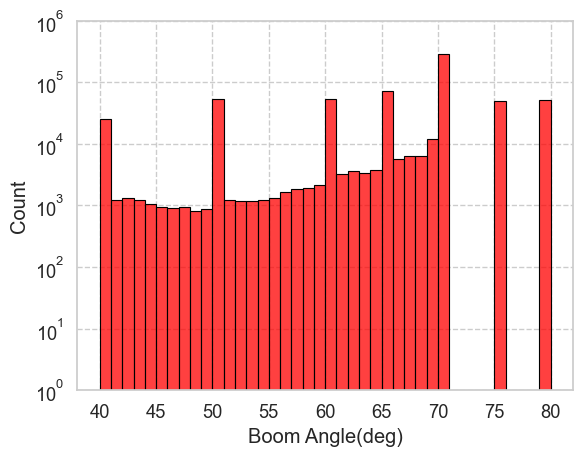

(658795,)


In [13]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.histplot(data=new_train_feature[:, 0], bins=40, edgecolor='black', color='red')

plt.xlabel('Boom Angle(deg)')
plt.yscale('log')
plt.ylim(1, 1000000)

plt.show()

print(new_train_feature[:, 0].shape)

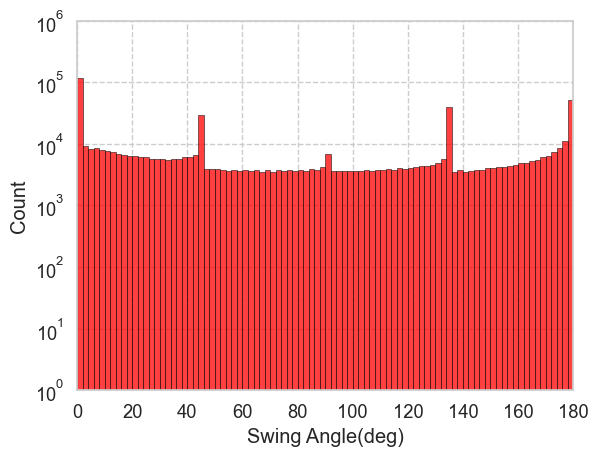

count    8.619000e+03
mean     7.668243e+01
std      6.247400e+01
min     -2.231278e-27
25%      1.618962e+01
50%      6.766569e+01
75%      1.350000e+02
max      1.800000e+02
Name: Swing_Angle(deg), dtype: float64


In [14]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.histplot(data=new_train_feature[:, 1], bins=90, edgecolor='black', color='red')

plt.xlim(0, 180)
plt.xlabel('Swing Angle(deg)')
plt.yscale('log')
plt.ylim(1, 1000000)

plt.show()

print(dataset['Swing_Angle(deg)'].describe())

(1, 1000000)

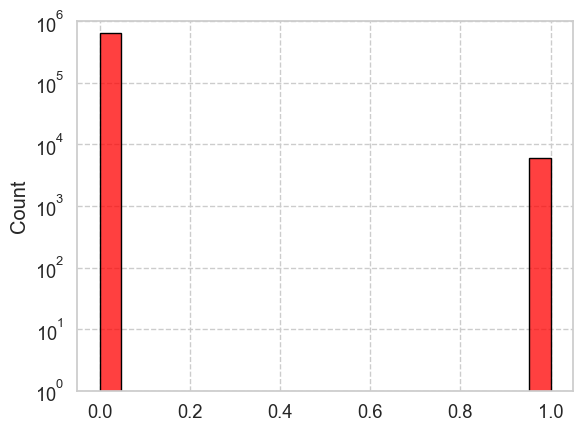

In [38]:
sns.set_theme(font_scale=1.2)
sns.set_style('whitegrid', {'grid.linestyle': '--'})

sns.histplot(new_train_target, edgecolor='black', color='red')

plt.yscale('log')
plt.ylim(1, 1000000)

In [16]:
new_train_feature

array([[ 60.     , 155.07748,  60.     ],
       [ 60.     , 155.39915,  60.     ],
       [ 60.     , 155.71922,  60.     ],
       ...,
       [ 70.     , 179.45926,  70.     ],
       [ 70.     , 179.61378,  70.     ],
       [ 70.     , 179.74277,  70.     ]], shape=(658795, 3))